In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 17

import seaborn as sns
import re
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
sns.set(style="ticks", color_codes=True)

## 1. Data
##### Data Dictionary
company<br>
    - String, company names

description<br>
    - String, full text description of job

estimated_salary<br>
    - String, Indeed's salary estimation

extractDate<br>
    - String(?), date record was webscrapped

job_type_items<br>
    - String, formatted list of 'full-time', 'part-time', etc

location<br>
    - String, state and city/remote

postDate<br>
    - String, date job posting was created

rating<br>
    - Float, Indeed.com ascribed company ratings

raw_desc_soup<br>
    - String, raw full description, retained for possible future use/analysis

requirements<br>
    - String, employer-listed educational, aptitude, and experience requirements

sal_guide_items<br>
    - String, formatted list containing redundant characters and the Indeed salary estimate

salary<br>
    - String, if given by employer

salary_and_jType<br>
    - String, formatted list combining salary from salfromsection and job_type_items

salfromsection<br>
    - String, salary, if given, extracted from job description

summary<br>
    - String, brief summaries of each job extracted from sach results

title<br>
    - String, job position title

url<br>
    - String, job posting/description address

### 1.1 Load & Inspect Data

In [2]:
data = pd.read_csv('../app/data/total.csv')
# 1.1.1 Inspect Table
data.info(memory_usage='deep')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1515 non-null   object 
 1   description       1515 non-null   object 
 2   estimated_salary  686 non-null    object 
 3   extractDate       1515 non-null   object 
 4   job_type_items    361 non-null    object 
 5   location          1515 non-null   object 
 6   postDate          1515 non-null   object 
 7   rating            1035 non-null   float64
 8   raw_desc_soup     1515 non-null   object 
 9   requirements      187 non-null    object 
 10  sal_guide_items   753 non-null    object 
 11  salary            447 non-null    object 
 12  salary_and_jType  1025 non-null   object 
 13  salfromsection    446 non-null    object 
 14  summary           1515 non-null   object 
 15  title             1515 non-null   object 
 16  url               1515 non-null   object 


,company,description,estimated_salary,extractDate,job_type_items,location,postDate,rating,raw_desc_soup,requirements,sal_guide_items,salary,salary_and_jType,salfromsection,summary,title,url
0,Online Technical Services,"Job descriptionData Scientist, MarketingSAN DI...",NaN,2022-04-13,['Full-time'],Remote,PostedJust posted,3.7,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",Master's (Preferred)Python: 1 year (Preferred)...,NaN,"$145,000 - $150,000 a year","$145,000 - $150,000 a year - Full-time","$145,000 - $150,000 a year",Identify relevant data sources and data sets t...,Data Scientist - Marketing,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,West CAP,HUMAN was founded in 2012 in a Brooklyn sci-fi...,Estimated $114K – $144K a year,2022-04-13,NaN,"Remote in New York, NY+2 locations",PostedJust posted,3.5,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,"['', 'Not provided by employer', ""$114K to $14...",NaN,Full-time,NaN,You’ve worked as a data scientist solving larg...,"Data Scientist, BotGuard",https://www.indeed.com/rc/clk?jk=58cdde046f643...
2,Maya Ai inc.,Our Maya team is expanding and we are looking ...,NaN,2022-04-13,"['Full-time', 'Part-time']",Remote,PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",Python: 1 year (Preferred)SQL: 1 year (Preferred),NaN,"$77,766 - $183,411 a year","$77,766 - $183,411 a year - Full-time, Part-time","$77,766 - $183,411 a year",Our Analyst will be dealing with data coming i...,Data Scientist,https://www.indeed.com/company/Maya-Ai-inc./jo...
3,"EMERGETECH, INC",Description:Job CategoryData ScienceAbout Emer...,Estimated $94.7K – $120K a year,2022-04-13,NaN,Remote,PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,"['', 'Not provided by employer', ""$94.7K to $1...",NaN,NaN,NaN,Design and create the data sources that ”citiz...,Data Scientist,https://www.indeed.com/rc/clk?jk=95fb128bb025f...
4,Recurrent,What's the opportunity?Recurrent is on a missi...,Estimated $119K – $151K a year,2022-04-13,NaN,"Remote in Seattle, WA",PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,"['', 'Not provided by employer', ""$119K to $15...",NaN,NaN,NaN,Experienced - you have 2+ years of experience ...,Data Scientist,https://www.indeed.com/rc/clk?jk=e9ce610b72deb...


In [3]:
print(data.salary[-50:])

1465                           NaN
1466                           NaN
1467                           NaN
1468                           NaN
1469                           NaN
1470                           NaN
1471    $135,000 - $150,000 a year
1472                           NaN
1473                           NaN
1474                           NaN
1475                           NaN
1476                           NaN
1477                           NaN
1478                           NaN
1479    $139,000 - $276,000 a year
1480                           NaN
1481               $191,100 a year
1482                           NaN
1483                           NaN
1484      $75,000 - $95,000 a year
1485      $85,000 - $97,000 a year
1486             $42 - $53 an hour
1487                           NaN
1488            $90 - $100 an hour
1489               $140,000 a year
1490    $139,000 - $276,000 a year
1491                           NaN
1492                           NaN
1493                

In [4]:
null = sum(data.salary.isnull())
nnull = sum(data.salary.notnull())
print('')
print(f'The data contains {data.shape[0]} rows of individual job postings with values for {data.shape[1]} columns based on\n different sections of each post\'s web page.')
print('')
print(f'- Out of {len(data)} job postings {nnull} or {round(nnull/len(data)*100,2)}% include some sort of salary information,\n- The remaining {null} rowws, or {round(null/len(data)*100,2)}% are missing salary data.\n- Also, there are no null values in the rest of the table meaning we won\'t need\n  to lose any data by dropping rows. While the null values in the Pay column will\n  simply be dropped after we translate the not nulls into the target.')


The data contains 1515 rows of individual job postings with values for 17 columns based on
 different sections of each post's web page.

- Out of 1515 job postings 447 or 29.5% include some sort of salary information,
- The remaining 1068 rowws, or 70.5% are missing salary data.
- Also, there are no null values in the rest of the table meaning we won't need
  to lose any data by dropping rows. While the null values in the Pay column will
  simply be dropped after we translate the not nulls into the target.


    The following table is a view of the raw data from the scrape. I'll build the target by reducing the pay column to floating point values; this will require text cleaning which will also be conducted for the rest of the table. Location will be split into new columns for City and State while and because Indeed's search results show dates relative to the date the query was made I'll need to use PostDate and ExtractDate build a DatePosted column. It is important to note that JobUrl and date-related columns will not be converted into features for the logistic regression, instead they will be reattached to the data at the end in order to provide additional information and insights through the EC2 application. The only rows that'l  be using for modelling are JobTitle, Company, Summary, Requirements, and Description.

In [5]:
shape = data.shape
print(f"The {shape[0]} rows of data have {shape[1]} features. Since this is a classification problem I'll be selecting one to be the target, leaving me with {shape[1]-1} features to work with.")

The 1515 rows of data have 17 features. Since this is a classification problem I'll be selecting one to be the target, leaving me with 16 features to work with.


In [6]:
#check for dupes
print(len(data[data.duplicated()]))


0


In [7]:
data[data.company == 'The Getch']

,company,description,estimated_salary,extractDate,job_type_items,location,postDate,rating,raw_desc_soup,requirements,sal_guide_items,salary,salary_and_jType,salfromsection,summary,title,url
1488,The Getch,Position Title: Sr. Data ScientistTimings: Eit...,NaN,2022-04-20,"['Full-time', 'Contract']",Remote,PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,NaN,$90 - $100 an hour,"$90 - $100 an hour - Full-time, Contract",$90 - $100 an hour,"As a Sr. Data Scientist , you will be responsi...",Senior Data Scientist,https://www.indeed.com/company/The-Getch/jobs/...
1503,The Getch,Position Title: Sr. Data ScientistTimings: Eit...,NaN,2022-04-20,"['Full-time', 'Contract']",Remote,PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,NaN,$90 - $100 an hour,"$90 - $100 an hour - Full-time, Contract",$90 - $100 an hour,"As a Sr. Data Scientist , you will be responsi...",Senior Data Scientist,https://www.indeed.com/company/The-Getch/jobs/...


In [8]:
data.sal_guide_items[-5:-4]

1510    ['', 'Not provided by employer', "$95.4K - $12...
Name: sal_guide_items, dtype: object

In [9]:
#check for missing
print(data.isna().sum().sort_values(ascending=False))

requirements        1328
job_type_items      1154
salfromsection      1069
salary              1068
estimated_salary     829
sal_guide_items      762
salary_and_jType     490
rating               480
url                    0
description            0
extractDate            0
raw_desc_soup          0
location               0
postDate               0
title                  0
summary                0
company                0
dtype: int64


The likelihood of seeing duplicates coming from the raw scrapping is very unlikely, but this is still a good check to do in case something changes with Indeed.com's front-end code.

Missing values are another story. It seems that Indeed.com doesn't require employers to provide values for every feature, this certainly seems to be the case with requirements, not to mention everywhere salary information coud be held.\
Others, like estimated salary and ratings are generated by Indeed.com but don't exist for every posting.\
job_type_items and salary_and_jType will likely be collapsed into a new column for job types, I'll also do the same with all of the salary related features to build the model's target.

In [10]:
# 1.1.2 Inspect & Modify Columns
data.nunique().sort_values(ascending=False)


raw_desc_soup       1395
url                  302
summary              165
description          119
company               97
title                 89
estimated_salary      89
sal_guide_items       87
location              83
salary_and_jType      38
salfromsection        34
salary                34
rating                22
requirements          10
extractDate            6
postDate               4
job_type_items         4
dtype: int64

In [11]:
data.columns = map(str.lower, data.columns)
# no need to change many column names because they're about to be dropped.
data = data.rename({'title': 'job_title'}, axis=1)

## 2. Preprocesing A
### 2.1 Reinspect Data

In [12]:
data.salary.unique()

array(['$145,000 - $150,000 a year', nan, '$77,766 - $183,411 a year',
       '$60 - $70 an hour', '$87,600 - $131,400 a year',
       '$120,000 - $135,000 a year', '$175,000 - $240,000 a year',
       '$32 - $34 an hour', '$159,800 - $210,200 a year',
       '$139,000 - $276,000 a year', '$106,916 - $182,047 a year',
       '$90,000 - $120,000 a year', '$130,000 - $160,000 a year',
       '$70 - $75 an hour', '$68,300 - $155,900 a year',
       '$125,000 - $175,000 a year', '$180,000 - $225,000 a year',
       '$169,300 - $338,500 a year', '$150,000 - $175,000 a year',
       '$150,000 - $180,000 a year', '$140,000 - $160,000 a year',
       '$150,000 - $200,000 a year', '$125,800 - $234,000 a year',
       '$100,000 - $150,000 a year', '$70,000 - $80,000 a year',
       '$143,000 - $194,000 a year', '$191,100 a year',
       '$75,000 - $95,000 a year', '$135,000 - $150,000 a year',
       '$85,000 - $97,000 a year', '$42 - $53 an hour',
       '$90 - $100 an hour', '$140,000 a year',

In [13]:
data.info(memory_usage='deep')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1515 non-null   object 
 1   description       1515 non-null   object 
 2   estimated_salary  686 non-null    object 
 3   extractdate       1515 non-null   object 
 4   job_type_items    361 non-null    object 
 5   location          1515 non-null   object 
 6   postdate          1515 non-null   object 
 7   rating            1035 non-null   float64
 8   raw_desc_soup     1515 non-null   object 
 9   requirements      187 non-null    object 
 10  sal_guide_items   753 non-null    object 
 11  salary            447 non-null    object 
 12  salary_and_jtype  1025 non-null   object 
 13  salfromsection    446 non-null    object 
 14  summary           1515 non-null   object 
 15  job_title         1515 non-null   object 
 16  url               1515 non-null   object 


,company,description,estimated_salary,extractdate,job_type_items,location,postdate,rating,raw_desc_soup,requirements,sal_guide_items,salary,salary_and_jtype,salfromsection,summary,job_title,url
0,Online Technical Services,"Job descriptionData Scientist, MarketingSAN DI...",NaN,2022-04-13,['Full-time'],Remote,PostedJust posted,3.7,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",Master's (Preferred)Python: 1 year (Preferred)...,NaN,"$145,000 - $150,000 a year","$145,000 - $150,000 a year - Full-time","$145,000 - $150,000 a year",Identify relevant data sources and data sets t...,Data Scientist - Marketing,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,West CAP,HUMAN was founded in 2012 in a Brooklyn sci-fi...,Estimated $114K – $144K a year,2022-04-13,NaN,"Remote in New York, NY+2 locations",PostedJust posted,3.5,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,"['', 'Not provided by employer', ""$114K to $14...",NaN,Full-time,NaN,You’ve worked as a data scientist solving larg...,"Data Scientist, BotGuard",https://www.indeed.com/rc/clk?jk=58cdde046f643...
2,Maya Ai inc.,Our Maya team is expanding and we are looking ...,NaN,2022-04-13,"['Full-time', 'Part-time']",Remote,PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",Python: 1 year (Preferred)SQL: 1 year (Preferred),NaN,"$77,766 - $183,411 a year","$77,766 - $183,411 a year - Full-time, Part-time","$77,766 - $183,411 a year",Our Analyst will be dealing with data coming i...,Data Scientist,https://www.indeed.com/company/Maya-Ai-inc./jo...
3,"EMERGETECH, INC",Description:Job CategoryData ScienceAbout Emer...,Estimated $94.7K – $120K a year,2022-04-13,NaN,Remote,PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,"['', 'Not provided by employer', ""$94.7K to $1...",NaN,NaN,NaN,Design and create the data sources that ”citiz...,Data Scientist,https://www.indeed.com/rc/clk?jk=95fb128bb025f...
4,Recurrent,What's the opportunity?Recurrent is on a missi...,Estimated $119K – $151K a year,2022-04-13,NaN,"Remote in Seattle, WA",PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,"['', 'Not provided by employer', ""$119K to $15...",NaN,NaN,NaN,Experienced - you have 2+ years of experience ...,Data Scientist,https://www.indeed.com/rc/clk?jk=e9ce610b72deb...


### 2.2 Diagnose Data
In order to proceed with any statistical or exploratory data analysis I will need to wrangle the data quite a bit.
Here, I'll list each of the current feature columns and briefly describe what I'll need to do with them.

In [14]:
# converting to lower and removing ounctuation/special charcters
#TODO remember to remove punct/spec - NPL may take care of this.
data.company.unique()[:10]

array(['Online Technical Services', 'West CAP', 'Maya Ai inc.',
       'EMERGETECH, INC', 'Recurrent', 'Fractal.ai', 'TechTrueUP', 'EAB',
       'Ford Motor Company', 'Redfin'], dtype=object)

'description'\
Each value is a unique string of the full job description. I'll lower and remove special characters but this feature will be dealt with seperately in its own NLP process.


In [15]:
data.description[0]

"Job descriptionData Scientist, MarketingSAN DIEGO, CA /ANALYTICS – DATA SCIENCE /FULL-TIMEHeadquartered in San Diego, we serve as a leading provider of working capital ($5K - $1.5M) to the small and medium-sized businesses that fuel our country. Since 2008, we have prided ourselves on our collaborative, innovative, and customer-focused approach. Enjoying a period of unprecedented growth, driven by the combination of cutting-edge technology, human touch, and unwavering integrity, we are looking to add to our people-first culture, with highly motivated and results-oriented professionals, to push the limits of what's possible while creating value for all of our partners.We are seeking a mid-level to senior level statistician, quantitative modeling specialist, or data scientist to join our Analytics team and build predictive models for marketing. If you have exceptional analytical, quantitative and problem-solving skills, demonstrated experience designing and implementing predictive model

'estimated_salary'\
Indeed.com provides its own salary estimates in what appear to be bins.
These and all other salary ranges will be collapsed to their median values once I've extracted and converted their numeric string reresentations.


In [16]:
data.estimated_salary.unique()[:5]

array([nan, 'Estimated $114K – $144K a year',
       'Estimated $94.7K – $120K a year',
       'Estimated $119K – $151K a year', 'Estimated $137K – $174K a year'],
      dtype=object)

'sal_guide_items'\
While I could convert these to lists, the only information I need (salary) can be parsed out.

In [17]:
data.sal_guide_items.unique()[:5]

array([nan,
       '[\'\', \'Not provided by employer\', "$114K to $144K per year is Indeed\'s estimated salary for data scientist in New York, NY."]',
       '[\'\', \'Not provided by employer\', "$94.7K to $120K per year is Indeed\'s estimated salary for data scientist in Remote."]',
       '[\'\', \'Not provided by employer\', "$119K to $151K per year is Indeed\'s estimated salary for data scientist in Seattle, WA."]',
       '[\'\', \'Not provided by employer\', "$137K to $174K per year is Indeed\'s estimated salary for data scientist in New York, NY."]'],
      dtype=object)

'salary_and_jtype' & 'salfromsection'\
These will be wrangled in much the same way. The only other pertinent information in these features would be the job_type data already found in job_type_items,

In [18]:
data.salary_and_jtype.unique()[:3]

array(['$145,000 - $150,000 a year -  Full-time', 'Full-time',
       '$77,766 - $183,411 a year -  Full-time, Part-time'], dtype=object)

In [19]:
data.salfromsection.unique()[:5]

array(['$145,000 - $150,000 a year', nan, '$77,766 - $183,411 a year',
       '$60 - $70 an hour', '$87,600 - $131,400 a year'], dtype=object)

'salary'\
Several different approaches will need to be used to extract salary information from this feature because employers provide this information themselves.
For one example, the pay periods of hour, day, week etc will need to be scaled to an anuual scale so I can have a standard scale to start wiith.
The salary ranges also appear here, so I'll be extracting numeric string characters, converting them into floats representing the lower and upper bounds of each range, and taking their medaian value.

In [20]:
data.salary.unique()[:5]

array(['$145,000 - $150,000 a year', nan, '$77,766 - $183,411 a year',
       '$60 - $70 an hour', '$87,600 - $131,400 a year'], dtype=object)

'extractdate' & 'postdate'\
extract_date is a string showing the day the record was webscrapped.
post_date is a string description of the relative age of each post from the date it was posted to the day it was webscrapped.
Converting post_date to a number will give me the the posts ae, which I'll then subtract from it's extract date in order to build a new feature carrying values for the DATE each job posting has been submitted to Indeed.com.


In [21]:
data.postdate.unique()[:5]

array(['PostedJust posted', 'PostedToday', 'Hiring ongoing',
       'Posted1 day ago'], dtype=object)

In [22]:
data.extractdate.unique()[:5]

array(['2022-04-13', '2022-04-14', '2022-04-15', '2022-04-17',
       '2022-04-19'], dtype=object)

'job_type_items'\
    I'm going to treat these as likert values, converrting each of these string formatted lists into an ordinal values for a new column.


In [23]:
data.job_type_items.unique()

array(["['Full-time']", nan, "['Full-time', 'Part-time']",
       "['Full-time', 'Contract']", "['Full-time', 'Temporary']"],
      dtype=object)

'location'\
This feature holds a wealth of information: state, city/remote, and in some cases a zip code.
Zip codes seem to be a recent addition to the information I can get from Indeed.com but since its presence is rather sparse I'll just extract city/remote and state values, splitting them into their respective columns.

In [24]:
data.location.unique()[:5]

array(['Remote', 'Remote in New York, NY+2 locations',
       'Remote in Seattle, WA', 'Remote in New York, NY',
       'Remote in Washington, DC 20036'], dtype=object)

'rating'\
As the only feature coming in with numeric (float) values I should just need to scale it. I'll address missing values by imputing zero. The rationale behind this is that an unrated company should simply be rated as zero.

In [25]:
print(sorted(data.rating.unique()))

[3.5, 3.7, nan, 1.5, 2.0, 2.5, 2.6, 2.9, 3.0, 3.2, 3.3, 3.4, 3.6, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 5.0]


'raw_desc_soup'\
I'm only saving this in case I refine or change my parsing. Below is a truncated slice of one of the raw records.

In [26]:
data.raw_desc_soup[1][:1000]

'<!DOCTYPE html>\n\n<html dir="ltr" lang="en">\n<head>\n<script crossorigin="anonymous" defer="" src="//d3fw5vlhllyvee.cloudfront.net/m/s/d33a2798ce09eea9cc81/scripts/viewjob.js"></script>\n<title>Data Scientist, BotGuard - New York, NY - Indeed.com</title><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="notranslate" name="google"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="noindex" name="robots"/><meta content="https://www.indeed.com/viewjob?from=appsharedroid&amp;jk=58cdde046f64371c" id="indeed-share-url"/><meta content="Data Scientist, BotGuard" id="indeed-share-message"/><meta content="simple" id="indeed-share-type"/><meta content="Data Scientist, BotGuard - New York, NY - Indeed.com" property="og:title"/><meta content="Data Scientist, BotGuard - New York, NY - Indeed.com" name="twitter:title"/><meta content="summary_large_image" name="twitter:card"/><meta content="@indeed" name="twitter:site"/><met

'requirements'\
I will most likely merge this in with the description prior to conducting NLP. The rationale is that these explicit requirements may be echoed in the description or summary, so by adding them to the corpus I'll raise the scores derived from their increaseed frequency. Eventually I wiuld like to build a set of requirements that I can use in with a clustering algorithm, like KNN, to find/define subgroups within the sample population.

In [27]:
data.requirements[0]

"Master's (Preferred)Python: 1 year (Preferred)SQL: 1 year (Preferred)"

'summary'\
Much like the description, these are unique. COming from the search results page itself, these are brief descriptions of each job. In most cases this is not merely an abridgement of the summary. Like 'requirement' I'll start by lumping these texts in with description so analysis of the corpus can be boosted by the added descriptions.

In [28]:
for i in data.summary[:3]:
    print(i)

Identify relevant data sources and data sets to deliver insights and analysis for business decision-making. Source, cleanse and verify data.
You’ve worked as a data scientist solving large-scale data intensive problems in production systems (we process trillions of events per day, so literacy with…
Our Analyst will be dealing with data coming in from BI platforms for Maya to analyze for marketing insights and predictions. Experience with Python and/or.


'job_title'\
Although the webscrapper searches for 'data scientist' the results contain over 80 unique job titles. This is largely due to a prefix or suffix that provides the role's specialization at that particular company for that particular job posting. These include items like 'Marketing', 'Senior', 'Geospatial...'.
I'll start by cleaning and simplifying these values, i.e. appearences of 'Sr' can be converted to 'Senior'. This will significantly reduce the number of unique values, hopefully increasing model accuracy.

In [29]:
print(len(data.job_title.unique()))
data.job_title.unique()[:10]

89


array(['Data Scientist - Marketing', 'Data Scientist, BotGuard',
       'Data Scientist', 'MCS Data Scientist', 'Associate Data Scientist',
       'Geospatial Data Scientist - Remote',
       'Senior Data Analyst - Tour Support (Remote Eligible)',
       'Data Scientist II', 'Sr. Data Scientist', 'Senior Data Analyst'],
      dtype=object)

'url'\
Like raw_doc_soup, I'm simply keeping these in case I need to go back and re-parse the raw data. In fact, this URL points directly to the page where that raw doc soup is found.
I may also be able to detect job post updates and duplicates by using these unique addresses.

In [30]:
data.url[0]

'https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CO3lo8tTSczNz5vS4BPhUQq5cXCmywFqjKhWVhQ5Cs0rpojEv2EMPlMF6RJyTPSWyz_jsR_97aGBu_tsR4MZoGXIHGV-TuTZJ1GgnqUTNh_NOmvL22DHTkffMgHPb4H3uAtf7OG1ZRk35vsaF_O6Cb3Eiu79RcVNJM7tHMXRpb6xuu2Nm87-f74oO85uzlaLUVKOnFDu6ZH2mz0qooDYDHNP3BDEPNpjBJdFQ0DVvzmu0A--5fpTpO94rB1SPmkHdCJI0NhRhSd3oG6nFNqu3O5HLbpHyM504ZKcnX7F84n9Et8MJyX-trWXNlhqtj721rXaQQLs9CdyQXTMmHDiXsmnkW_dUM0yXrvvsZokba5epb9xtM5aBupuhJ1UB5OuJ2A_jUdInPD-paiEWtaMb2rjllecKGVmOO2VURUVo5HSCgDzj4MJ2K4B3W4m_R0E0rltrIMrxtINKOjCzK-Mxv-6kL1DZjPYJo1ucmJ3Uobst5ADvtlCA1&p=0&fvj=1&vjs=3'

### 2.3 Wrangling & Feature Engineering
Below are the implementations of the data wrangling steps I described above for each feature. Using Numpy, Regex, and Pandas I'll simutaneaously clean the strings, extract and convert numeric information, and create new feature columns.

In [31]:

def sal_chars(data):
    """When applied, substitutes '' for any listed special characters, 

    Args:
        data (column values): I call this function on specific columns. Data, in this case, represents that column and its values.

    Returns:
        string: the original string values, sans any listed special characters.
    """
    cleaned = re.sub(r'[\n|,|+|$|[|$|\'|"]',r'',data)
    return cleaned

def sal_splitter(data):
    """Splits off salary information from a string formatted list

    Args:
        data (column values):  I call this function on specific columns. Data, in this case, represents that column and its values.

    Returns:
        string: returns the split containing salary information.
    """
    x = data.split(',')
    return x[2]

def Pay_period(data):
    """Used in the creation of a temporary column that will be discarded once I use it to generate a annualized salary column.

    Args:
        data (string): I call this function on specific columns. Data, in this case, represents that column and its values.

    Returns:
        string: pay rate descripions
    """
    z = ''
    substrings = ['hour','day','week','year']
    for i in substrings:
        if i in data:
            return i
        else:
            continue

def jobtype(data):
    """Used for creating a new feature containing nominal values for the job type.

    Args:
        data (string): Values from the 'job_type_items' column.

    Returns:
        string: Extracted and simplified values for each category.
    """
    if type(data) == str:
        if re.search('full', data):
            out = 'full'
        if re.search('part', data):
            out = 'part'
        if re.search('contract', data):
            out = 'contract'
        if re.search('temp', data):
            out = 'temp'
        return out
    else:
        pass

def annual(data):
    """Annualizes salary data

    Args:
        data (dataframe): the entire dataframe is passed through.

    Returns:
        string: In the new 'annual_sal' column, creates annualized salaries by multiplying them against the observed (and previously extracted) pay rates.
    """
    data['annual_sal'] = np.nan
    data['annual_sal'] = np.where(data['schedule'].str.contains("hour"), data.salary*40*(365/7), data['salary'])
    #data['annual_sal'] = np.where(data['schedule'].str.contains("day"), data['salary']*365/7*5, data['salary'])
    #data['annual_sal'] = np.where(data['schedule'].str.contains("week"), data['salary']*365/7, data['salary'])
    #data['annual_sal'] = np.where(data['schedule'].str.contains("month"), data['salary']*365/12, data['salary'])
    #data['annual_sal'] = np.where(data['schedule'].str.contains("year"), data['salary']/100, data['salary'])
    return data

def split_sal(i):
    try:
        lst = i.split('-',1)
        x = lst[0]
        y = lst[1]
        
        y = re.sub(r'[–]',r'',y)

        return (float(x)+float(y))/2
    except:
        return i

In [32]:
salary = data[data.salary.notnull()]
data[['salary',]] = salary['salary'].apply(sal_chars)


In [33]:


estimated_salary = data[data.estimated_salary.notnull()]
data['estimated_salary'] = estimated_salary['estimated_salary'].apply(sal_chars)


In [34]:

salfromsection = data[data.salfromsection.notnull()]
data[['salfromsection',]] = salfromsection['salfromsection'].apply(sal_chars)

salary_and_jtype = data[data.salfromsection.notnull()]
data[['salary_and_jtype',]] = salary_and_jtype['salary_and_jtype'].apply(sal_chars)




In [35]:


sal_guide_arr = data[data.sal_guide_items.notnull()]
data[['sal_guide_items']] = sal_guide_arr['sal_guide_items'].apply(sal_splitter)

sal_guide_arr = data[data.sal_guide_items.notnull()]
data[['sal_guide_items']] = sal_guide_arr['sal_guide_items'].apply(sal_chars)


In [36]:


estimated_salary = data[data['estimated_salary'].notnull()]
data['Schedule1'] = estimated_salary['estimated_salary'].apply(Pay_period)

sal_guide_items = data[data['sal_guide_items'].notnull()]
data['Schedule2'] = sal_guide_items['sal_guide_items'].apply(Pay_period)

salary = data[data['salary'].notnull()]
data['Schedule3'] = salary['salary'].apply(Pay_period)

salary_and_jtype = data[data['salary_and_jtype'].notnull()]
data['Schedule4'] = salary_and_jtype['salary_and_jtype'].apply(Pay_period)

salfromsection = data[data['salfromsection'].notnull()]
data['Schedule5'] = salfromsection['salfromsection'].apply(Pay_period)

val_cols = ['Schedule1','Schedule2','Schedule3','Schedule4','Schedule5']
data['schedule'] = data[val_cols].bfill(axis=1).iloc[:, 0]
data.drop(val_cols,inplace=True,axis=1)



In [37]:
def splitter(data):
    lst = []
    if type(data) ==  str:
        for val in re.findall('([0-9\.]+)',data):
            lst.append(val)
        if len(lst) > 1:
            return (float(lst[0])+float(lst[1]))/2
        #



            

                    
                
     
            
        
        


data['estimated_salary'] = data['estimated_salary'].apply(splitter)
data['salary'] = data['salary'].apply(splitter)
col = ['estimated_salary','salary']
data['salary'] = data[col].bfill(axis=1).iloc[:, 0]
data

,company,description,estimated_salary,extractdate,job_type_items,location,postdate,rating,raw_desc_soup,requirements,sal_guide_items,salary,salary_and_jtype,salfromsection,summary,job_title,url,schedule
0,Online Technical Services,"Job descriptionData Scientist, MarketingSAN DI...",NaN,2022-04-13,['Full-time'],Remote,PostedJust posted,3.7,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",Master's (Preferred)Python: 1 year (Preferred)...,NaN,147500.00,145000 - 150000 a year - Full-time,145000 - 150000 a year,Identify relevant data sources and data sets t...,Data Scientist - Marketing,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,year
1,West CAP,HUMAN was founded in 2012 in a Brooklyn sci-fi...,129.00,2022-04-13,NaN,"Remote in New York, NY+2 locations",PostedJust posted,3.5,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,114K to 144K per year is Indeeds estimated sa...,129.00,NaN,NaN,You’ve worked as a data scientist solving larg...,"Data Scientist, BotGuard",https://www.indeed.com/rc/clk?jk=58cdde046f643...,year
2,Maya Ai inc.,Our Maya team is expanding and we are looking ...,NaN,2022-04-13,"['Full-time', 'Part-time']",Remote,PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",Python: 1 year (Preferred)SQL: 1 year (Preferred),NaN,130588.50,77766 - 183411 a year - Full-time Part-time,77766 - 183411 a year,Our Analyst will be dealing with data coming i...,Data Scientist,https://www.indeed.com/company/Maya-Ai-inc./jo...,year
3,"EMERGETECH, INC",Description:Job CategoryData ScienceAbout Emer...,107.35,2022-04-13,NaN,Remote,PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,94.7K to 120K per year is Indeeds estimated s...,107.35,NaN,NaN,Design and create the data sources that ”citiz...,Data Scientist,https://www.indeed.com/rc/clk?jk=95fb128bb025f...,year
4,Recurrent,What's the opportunity?Recurrent is on a missi...,135.00,2022-04-13,NaN,"Remote in Seattle, WA",PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,119K to 151K per year is Indeeds estimated sa...,135.00,NaN,NaN,Experienced - you have 2+ years of experience ...,Data Scientist,https://www.indeed.com/rc/clk?jk=e9ce610b72deb...,year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,Lucid Technologies Inc,Job Title: Information Security Data Scientist...,108.20,2022-04-20,NaN,"Remote in Dallas, TX",PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,95.4K - 121K a year is Indeeds estimated sala...,108.20,NaN,NaN,Participate as a key member of the analytics a...,Information Security Data Scientist (Remote),https://www.indeed.com/rc/clk?jk=6202e64a38d75...,year
1511,Windstream Communications,We are looking for a data scientist to help us...,NaN,2022-04-20,NaN,Remote,PostedJust posted,3.2,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,NaN,NaN,NaN,NaN,You will also be responsible for acquisition o...,Senior Data Scientist,https://www.indeed.com/rc/clk?jk=5362358221574...,NaN
1512,Edmunds.com,At Edmunds we’re driven to make car buying eas...,53.80,2022-04-20,NaN,"Remote in Santa Monica, CA 90404",PostedJust posted,3.4,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,47.5K to 60.1K per year is Indeeds estimated ...,53.80,NaN,NaN,The senior analyst/data scientist will serve a...,Senior Analyst/Data Scientist,https://www.indeed.com/rc/clk?jk=9dcaee4b15174...,year
1513,One Concern,About One Concern One Concern brings disaster ...,134.00,2022-04-20,NaN,Remote,PostedJust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,118K - 150K a year is Indeeds estimated salar...,134.00,NaN,NaN,Collaborate with an interdisciplinary team of ...,"Senior Data Scientist, Wind Resilience",https://www.indeed.com/rc/clk?jk=22dd09644fe6b...,year


In [38]:


cols = ['company','description', 'job_type_items','location','postdate','requirements',	'summary','job_title']
for txt_col in cols:
    data[txt_col] = data[txt_col].str.lower()



data['jobtype'] = data.job_type_items.apply(jobtype)

data['text'] = data.description+' '+data.summary
#TODO add requirements

cols = ['job_type_items','raw_desc_soup','url','description','summary','requirements']


data.text = data.text.replace(')',' ')



data = annual(data)
#data.schedule.value_counts() keep and eye on this, may have to deal with more than just hourly

In [39]:
def reducer(data):
    if data > 1000:
        return round(data/1000)
    elif data > 1:
        return round(data)
    else:
        return data
    
data['final_sal'] = data.annual_sal.apply(reducer)



def restorer(data):
    if data > 1:
        return data*1000
    else:
        return data
data['final_sal'] = data.final_sal.apply(restorer)

In [40]:
data

,company,description,estimated_salary,extractdate,job_type_items,location,postdate,rating,raw_desc_soup,requirements,...,salary_and_jtype,salfromsection,summary,job_title,url,schedule,jobtype,text,annual_sal,final_sal
0,online technical services,"job descriptiondata scientist, marketingsan di...",NaN,2022-04-13,['full-time'],remote,postedjust posted,3.7,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",master's (preferred)python: 1 year (preferred)...,...,145000 - 150000 a year - Full-time,145000 - 150000 a year,identify relevant data sources and data sets t...,data scientist - marketing,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,year,full,"job descriptiondata scientist, marketingsan di...",147500.00,148000.0
1,west cap,human was founded in 2012 in a brooklyn sci-fi...,129.00,2022-04-13,NaN,"remote in new york, ny+2 locations",postedjust posted,3.5,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,...,NaN,NaN,you’ve worked as a data scientist solving larg...,"data scientist, botguard",https://www.indeed.com/rc/clk?jk=58cdde046f643...,year,None,human was founded in 2012 in a brooklyn sci-fi...,129.00,129000.0
2,maya ai inc.,our maya team is expanding and we are looking ...,NaN,2022-04-13,"['full-time', 'part-time']",remote,postedjust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",python: 1 year (preferred)sql: 1 year (preferred),...,77766 - 183411 a year - Full-time Part-time,77766 - 183411 a year,our analyst will be dealing with data coming i...,data scientist,https://www.indeed.com/company/Maya-Ai-inc./jo...,year,part,our maya team is expanding and we are looking ...,130588.50,131000.0
3,"emergetech, inc",description:job categorydata scienceabout emer...,107.35,2022-04-13,NaN,remote,postedjust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,...,NaN,NaN,design and create the data sources that ”citiz...,data scientist,https://www.indeed.com/rc/clk?jk=95fb128bb025f...,year,None,description:job categorydata scienceabout emer...,107.35,107000.0
4,recurrent,what's the opportunity?recurrent is on a missi...,135.00,2022-04-13,NaN,"remote in seattle, wa",postedjust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,...,NaN,NaN,experienced - you have 2+ years of experience ...,data scientist,https://www.indeed.com/rc/clk?jk=e9ce610b72deb...,year,None,what's the opportunity?recurrent is on a missi...,135.00,135000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,lucid technologies inc,job title: information security data scientist...,108.20,2022-04-20,NaN,"remote in dallas, tx",postedjust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,...,NaN,NaN,participate as a key member of the analytics a...,information security data scientist (remote),https://www.indeed.com/rc/clk?jk=6202e64a38d75...,year,None,job title: information security data scientist...,108.20,108000.0
1511,windstream communications,we are looking for a data scientist to help us...,NaN,2022-04-20,NaN,remote,postedjust posted,3.2,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,...,NaN,NaN,you will also be responsible for acquisition o...,senior data scientist,https://www.indeed.com/rc/clk?jk=5362358221574...,NaN,None,we are looking for a data scientist to help us...,NaN,NaN
1512,edmunds.com,at edmunds we’re driven to make car buying eas...,53.80,2022-04-20,NaN,"remote in santa monica, ca 90404",postedjust posted,3.4,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,...,NaN,NaN,the senior analyst/data scientist will serve a...,senior analyst/data scientist,https://www.indeed.com/rc/clk?jk=9dcaee4b15174...,year,None,at edmunds we’re driven to make car buying eas...,53.80,54000.0
1513,one concern,about one concern one concern brings disaster ...,134.00,2022-04-20,NaN,remote,postedjust posted,NaN,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"">\...",NaN,...,NaN,NaN,collaborate with an interdisciplinary t

Let's see what the data looks like at this point. It looks like the 17 original features have been reduced to 11. Most of the columns have been collapsed and cleaned, too. Just a bit more work till this is ready for EDA, NLP, and transformations.

In [41]:
data.salary

0       147500.00
1          129.00
2       130588.50
3          107.35
4          135.00
          ...    
1510       108.20
1511          NaN
1512        53.80
1513       134.00
1514        89.50
Name: salary, Length: 1515, dtype: float64

In [42]:
def postD(data):
    """Critical function that converts postdate values into relative (in days) distance from the extract date.

    Args:
        data (string): text descrption of how old the post is.

    Returns:
        npnan or int: numeric representation of post age
    """
    if data != np.nan:
        rid = ['active','%+ days ago','+']
        for i in rid:
            if i in data:
                return np.nan
        
        rid2 = ['just posted','today','postedjust posted','postedtoday','hiring ongoing']
        for i in rid2:
            if i in data:
                return 0   
            
        rid3 = ['posted1 day ago']
        for i in rid3:
            if i in data:
                return 1


    #data['dateposted'] = data['dateposted'].astype('int')
    return data

def pDate(row):
    """Subtracts the distance (in days) provided by the postD function.
    Args:
        row (record in the data): record

    Returns:
        datetime object: extract date - relative age = actual post date
    """

    days_ago = row['dateposted']
    delta = timedelta(days_ago)
    try:
        return row['extractdate'] - delta
    except:
        return row

def sal_fixer(data):
    """Ensures that all salaries are on the same annualized scale.

    Args:
        data (float): values from the salary column

    Returns:
        float: annualized salary
    """
    if type(data) != np.nan:
        data = round(data,0)

        if len(str(data)) < 5:
            data*=1000
    else:
        pass
    return data

In [43]:
data['dateposted'] = data.postdate.apply(postD)
data['extractdate']= pd.to_datetime(data['extractdate'])

data['dateposted'] = data.apply( lambda row : pDate(row), axis = 1)

data.rating = data.rating.fillna(0)

cols = ['extractdate','postdate','schedule','jobtype','salary']
data.drop(cols,inplace=True,axis=1)
data = data.rename({'annual_sal': 'salary'}, axis=1)

data['salary'] = data['salary'].apply(sal_fixer)

In [44]:
data.salary

0       147500.0
1          129.0
2       130588.0
3          107.0
4          135.0
          ...   
1510       108.0
1511         NaN
1512     54000.0
1513       134.0
1514     90000.0
Name: salary, Length: 1515, dtype: float64

In [45]:
def states_(i):
    """Extracts state values from location

    Args:
        i (string): values from location

    Returns:
        string: extracted state value
    """
    if ',' in i:
        fix =  i.partition(',')[2].strip()
        if len(fix) >2:
            return fix[:2]
        else:
            return fix
    if ',' not in i:
        return i
    elif 'remote' in i:
        return 'remote'


def cities_(i):
    """Extracts city values from location

    Args:
        i (string): values from location

    Returns:
        string: extracted city value
    """
    if ',' in i:
        return i.partition(',')[0]
    if ',' not in i:
        return i
    elif 'remote' in i:
        return 'remote'

data['state'] = data.location.apply(states_)
data['city'] = data["location"].apply(cities_)
#data[data.state.isnull()] = 'remote'

In [46]:
data.columns
cols = ['description','salary','requirements','estimated_salary', 'job_type_items', 'location','raw_desc_soup', 'sal_guide_items','salary_and_jtype', 'salfromsection', 'summary','url']
data.drop(cols,inplace=True,axis=1)
data.rename(columns={'final_sal': 'salary'},inplace=True)

### 2.4 Assessment

In [47]:
data.info(memory_usage='deep')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   company     1515 non-null   object        
 1   rating      1515 non-null   float64       
 2   job_title   1515 non-null   object        
 3   text        1515 non-null   object        
 4   salary      1129 non-null   float64       
 5   dateposted  1515 non-null   datetime64[ns]
 6   state       1515 non-null   object        
 7   city        1515 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 12.3 MB


,company,rating,job_title,text,salary,dateposted,state,city
0,online technical services,3.7,data scientist - marketing,"job descriptiondata scientist, marketingsan di...",148000.0,2022-04-13,remote,remote
1,west cap,3.5,"data scientist, botguard",human was founded in 2012 in a brooklyn sci-fi...,129000.0,2022-04-13,ny,remote in new york
2,maya ai inc.,0.0,data scientist,our maya team is expanding and we are looking ...,131000.0,2022-04-13,remote,remote
3,"emergetech, inc",0.0,data scientist,description:job categorydata scienceabout emer...,107000.0,2022-04-13,remote,remote
4,recurrent,0.0,data scientist,what's the opportunity?recurrent is on a missi...,135000.0,2022-04-13,wa,remote in seattle


In [48]:
shape = data.shape
print(f"The {shape[0]} rows of data now have {shape[1]} variables whose values are now cleaned and typed properly.\nThe only missing values are in Salary which is my target.\nNext, I'll conduct analysis, encoding, and scaling of each feature, starting with Salary which .")
data.describe(include = 'all')


The 1515 rows of data now have 8 variables whose values are now cleaned and typed properly.
The only missing values are in Salary which is my target.
Next, I'll conduct analysis, encoding, and scaling of each feature, starting with Salary which .


,company,rating,job_title,text,salary,dateposted,state,city
count,1515,1515.000000,1515,1515,1129.000000,1515,1515,1515
unique,97,NaN,88,173,NaN,7,30,51
top,sparkcognition,NaN,data scientist,we are currently seeking a senior data scienti...,NaN,2022-04-16 00:00:00,remote,remote
freq,80,NaN,348,68,NaN,381,386,386
first,NaN,NaN,NaN,NaN,NaN,2022-04-13 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-04-20 00:00:00,NaN,NaN
mean,NaN,2.521980,NaN,NaN,127871.567759,NaN,NaN,NaN
std,NaN,1.779933,NaN,NaN,34714.544866,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,54000.000000,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,104000.000000,NaN,NaN,NaN


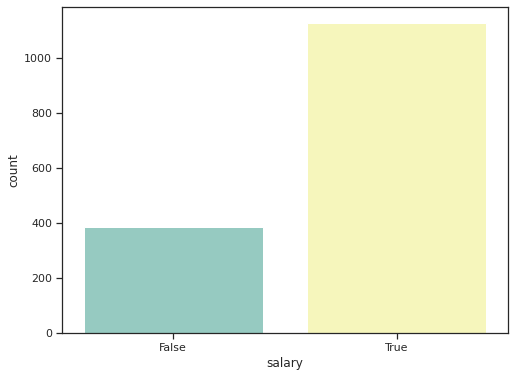

In [49]:
sns.countplot(x='salary', data=data.notnull(), palette='Set3')
plt.show()

In [50]:
null = len(data[data.salary.isnull()])
nnull = len(data[data.salary.notnull()])
print(f'{round(nnull/len(data)*100,2)}% of the data has salary information, should be an easy target')

74.52% of the data has salary information, should be an easy target


In [51]:
data.to_csv(f'../app/data/wrangled_data.csv', index=False)

In [52]:
data

,company,rating,job_title,text,salary,dateposted,state,city
0,online technical services,3.7,data scientist - marketing,"job descriptiondata scientist, marketingsan di...",148000.0,2022-04-13,remote,remote
1,west cap,3.5,"data scientist, botguard",human was founded in 2012 in a brooklyn sci-fi...,129000.0,2022-04-13,ny,remote in new york
2,maya ai inc.,0.0,data scientist,our maya team is expanding and we are looking ...,131000.0,2022-04-13,remote,remote
3,"emergetech, inc",0.0,data scientist,description:job categorydata scienceabout emer...,107000.0,2022-04-13,remote,remote
4,recurrent,0.0,data scientist,what's the opportunity?recurrent is on a missi...,135000.0,2022-04-13,wa,remote in seattle
...,...,...,...,...,...,...,...,...
1510,lucid technologies inc,0.0,information security data scientist (remote),job title: information security data scientist...,108000.0,2022-04-20,tx,remote in dallas
1511,windstream communications,3.2,senior data scientist,we are looking for a data scientist to help us...,NaN,2022-04-20,remote,remote
1512,edmunds.com,3.4,senior analyst/data scientist,at edmunds we’re driven to make car buying eas...,54000.0,2022-04-20,ca,remote in santa monica
1513,one concern,0.0,"senior data scientist, wind resilience",about one concern one concern brings disaster ...,134000.0,2022-04-20,remote,remote


In [ ]:
munged = data
munged

In [ ]:
null = len(munged[munged.salary.isnull()])
nnull = len(munged[munged.salary.notnull()])
print(f'Droping {len(data)-len(munged)} duplicates and out of date posts leaves {len(munged)} rows of data for the regressor to be trained and tested on.')
print(f'- Of those {len(munged)} job postings {nnull} or {round(nnull/len(munged)*100,2)}% include salary information,\n- The remaining {null} rows, or {round(null/len(munged)*100,2)}% are missing salary data.')

## Detecting Outliers: Using both the Z-Score and IQR methods
    Now that preprocessed the data and building the target variable of Salary let's see conduct a bit more EDA to see if there are any outliers that could potentially skew how the regressor will learn from the training data.

In [ ]:
ax = sns.pairplot(data=munged[munged.salary.notnull()],
                  x_vars=['dateposted'],
                  y_vars=['salary'], height=8, hue="salary", palette="crest")

ax.fig.set_size_inches(18,4)

A plot is helpful in isualizing data, but let's program a few functions to detect and remove outliers based on thresholds.
With the Z-Score, we can determine any data outside 3 standard deviations from the mean of our salary data to be an outlier.
Wheras with the interquartile (IQR) range, the middle 50% of given salaries, I'll set the conventional cutoff of 1.5+/- the IQR as the cutoff.
Values found outside of either range will be collected into a list and that'll allow for some fancy indexing so those particular postings can be examined and removed programatically.

#### Z-Score
Salaries 3 standard deviations away from the mean will be listed as outliers.

In [ ]:
outliers = []
def z_detect(munged):
    sample = munged[munged['salary'].notnull()].salary
    threshold=3
    mean = np.mean(sample)
    std = np.std(sample)
    
    for i in sample:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    if len(outliers) == 0:
        pass
    else:
        return outliers
z_detect(munged)

#### IQR
Salaries outside 1.5 times the interquartile range boundaries, either above or below will be listed as outliers.

In [ ]:
def iqr_detect(munged):
    sample = munged[munged['salary'].notnull()].salary
    Q1, Q3 = np.percentile(sample,[25,75])
    iqr = Q3-Q1
    lower_bound = Q1-(1.5*iqr)
    upper_bound = Q3+(1.5*iqr)
    for i in sample:
        if (i < lower_bound)  | (i > upper_bound):
            outliers.append(i)
    if len(outliers) == 0:
        pass
    else:
        return outliers
set(iqr_detect(munged))

In [ ]:
def unique(list1):
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    for x in unique_list:
        print(x)
        
mn = min(outliers)
mx = max(outliers)
print(f'The {len(set(outliers))} Unique Outliers Are:')
unique(outliers)
print(f'- With a minumum of ${round(mn)} and a maximum of ${round(mx)}')

In [ ]:
# Take a look at those tables.

outliers = munged[munged['salary'].isin(outliers)]
munged.drop(outliers.index, axis=0,inplace=True)
outliers

In [ ]:
null = len(munged[munged.salary.isnull()])
nnull = len(munged[munged.salary.notnull()])

In [ ]:
ax = sns.pairplot(data=munged[munged.salary.notnull()],
                  x_vars=['dateposted'],
                  y_vars=['salary'], height=8, hue="salary", palette="crest")

ax.fig.set_size_inches(18,4)

In [ ]:
sns.countplot(x='salary', data=munged.notnull(), palette='Set3')
print(f'- Dropping {len(outliers)} outliers now leaves {nnull}, or {round(nnull/len(munged)*100,2)}%, of rows with with salary information,\n- The remaining {null} rows, or {round(null/len(munged)*100,2)}%, are missing salary data.')


In [ ]:
munged.info()

In [ ]:
munged.to_csv(f'../app/data/wrangled_data.csv', index=False)

In [ ]:
munged.info()

In [ ]:
munged.info(memory_usage='deep')

In [ ]:
munged.drop('location',inplace=True,axis=1)

In [ ]:
munged.info(memory_usage='deep')